# An analysis of the Books dataset with recommendations and visualizations.

### Task 1:
Import Required libraries to read CSV files, data visualizations.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Task 2:
Read and save the file (Books, Rating, Tags) as dataframe.

In [2]:
books = pd.read_csv('books.csv')

In [3]:
books.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [4]:
ratings = pd.read_csv('ratings.csv')

In [5]:
ratings.head()

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


In [6]:
b_tags = pd.read_csv('book_tags.csv')

In [7]:
b_tags.tail()

,goodreads_book_id,tag_id,count
999907,33288638,21303,7
999908,33288638,17271,7
999909,33288638,1126,7
999910,33288638,11478,7
999911,33288638,27939,7


In [8]:
tags = pd.read_csv('tags.csv')

In [9]:
tags.tail()

,tag_id,tag_name
34247,34247,Ｃhildrens
34248,34248,Ｆａｖｏｒｉｔｅｓ
34249,34249,Ｍａｎｇａ
34250,34250,ＳＥＲＩＥＳ
34251,34251,ｆａｖｏｕｒｉｔｅｓ


### Task 3:
Check the is there any duplicates present in dataset? If there is any duplicate then remove duplicates.

In [10]:
books_dup = books.duplicated(subset = ['original_title']).sum()
print("The number of duplicate rows in books is", books_dup)

The number of duplicate rows in books is 725


In [11]:
books.drop_duplicates(subset = ['original_title'], keep = False, inplace = True) 

In [12]:
ratings_dup = ratings.duplicated(subset = ['user_id', 'book_id']).sum()
print("The number of duplicate rows in books is", ratings_dup)

The number of duplicate rows in books is 2278


In [13]:
ratings.drop_duplicates(subset =["user_id","book_id"], keep = False, inplace = True) 

In [14]:
tags_dup = tags.duplicated(subset=['tag_id']).sum()
print("The number of duplicate rows in tags is", tags_dup)

The number of duplicate rows in tags is 0


In [15]:
b_tags_dup = b_tags.duplicated(subset=['tag_id','goodreads_book_id']).sum()
print("The number of duplicate rows in book tags is", b_tags_dup)

The number of duplicate rows in book tags is 8


In [16]:
b_tags.drop_duplicates(subset=['tag_id','goodreads_book_id'],keep=False,inplace=True)

### Task 4:
1. Print top-10 rated books.
2. Print top-10 popular books.
3. Visualize the most common rating values.
4. Print top-10 highly rated authors.

In [17]:
# Top-10 Rated Books

top_rated=books.sort_values('average_rating', ascending=False)

Rated_top10_Book = top_rated.head(10)

print(Rated_top10_Book[['title','average_rating']])

                                                  title  average_rating
3627                     The Complete Calvin and Hobbes            4.82
861      Words of Radiance (The Stormlight Archive, #2)            4.77
8853                           Mark of the Lion Trilogy            4.76
4482  It's a Magical World: A Calvin and Hobbes Coll...            4.75
6360  There's Treasure Everywhere: A Calvin and Hobb...            4.74
421            Harry Potter Boxset (Harry Potter, #1-7)            4.74
3752       Harry Potter Collection (Harry Potter, #1-6)            4.73
6919                The Indispensable Calvin and Hobbes            4.73
6589  The Authoritative Calvin and Hobbes: A Calvin ...            4.73
9565  Attack of the Deranged Mutant Killer Monster S...            4.72


In [18]:
# Top-10 popular books

top_popular=books.sort_values('ratings_count', ascending=False)

Popular_top10_Book = top_popular.head(10)

print(Popular_top10_Book[['title','ratings_count']])

                                                title  ratings_count
0             The Hunger Games (The Hunger Games, #1)        4780653
1   Harry Potter and the Sorcerer's Stone (Harry P...        4602479
3                               To Kill a Mockingbird        3198671
4                                    The Great Gatsby        2683664
5                              The Fault in Our Stars        2346404
6                                          The Hobbit        2071616
7                              The Catcher in the Rye        2044241
9                                 Pride and Prejudice        2035490
8               Angels & Demons  (Robert Langdon, #1)        2001311
14                          The Diary of a Young Girl        1972666


<Figure size 1600x800 with 0 Axes>

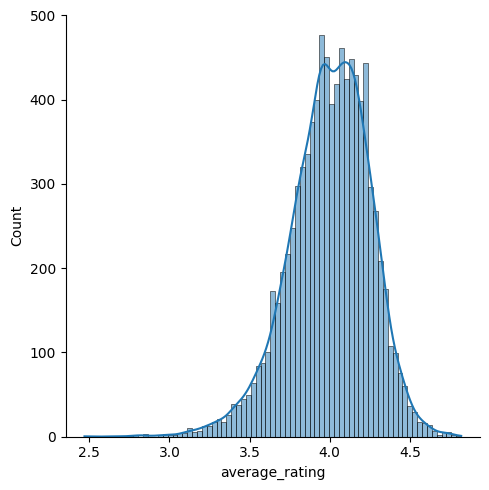

In [19]:
# Visualize the most common rating values

plt.figure(figsize = (16,8))

sns.displot(books['average_rating'], kde = True)

plt.show()

Therefore, the most common rating is somewhere between 3.5 to 4.

In [20]:
top_rated_author=books.sort_values('average_rating', ascending=False)

Rated_top10_Author = top_rated_author.head(10)

print(Rated_top10_Author[['authors','average_rating', 'original_publication_year', 'original_title']])

                authors  average_rating  original_publication_year  \
3627     Bill Watterson            4.82                     2005.0   
861   Brandon Sanderson            4.77                     2014.0   
8853    Francine Rivers            4.76                     1993.0   
4482     Bill Watterson            4.75                     1996.0   
6360     Bill Watterson            4.74                     1996.0   
421        J.K. Rowling            4.74                     1998.0   
3752       J.K. Rowling            4.73                     2005.0   
6919     Bill Watterson            4.73                     1992.0   
6589     Bill Watterson            4.73                     1990.0   
9565     Bill Watterson            4.72                     1992.0   

                                         original_title  
3627                     The Complete Calvin and Hobbes  
861                                   Words of Radiance  
8853                           Mark of the Lion Trilogy

### Task 5:
Perform the content based recommendation system on the basis of 'Title', 'Authors', 'Average Rating'.

In [21]:
# First fillna 

df_books = books.fillna('')

In [22]:
# Only extracting few features (title, authors, average_rating) from the dataset

df_books = df_books[['original_title', 'authors', 'average_rating']]
df_books = df_books.astype(str)

In [23]:
# Making all the words lower case

def lower_case(x):
    return str.lower(x.replace(" ", ""))

In [24]:
for col in df_books.columns:
    df_books[col] = df_books[col].apply(lower_case)
df_books.head()

,original_title,authors,average_rating
0,thehungergames,suzannecollins,4.34
1,harrypotterandthephilosopher'sstone,"j.k.rowling,marygrandpré",4.44
3,tokillamockingbird,harperlee,4.25
4,thegreatgatsby,f.scottfitzgerald,3.89
5,thefaultinourstars,johngreen,4.26


In [25]:
# Creating a "soup" or a "bag of words" for all rows.

def create_soup(x):
    return x['original_title'] + ' ' + x['authors'] + ' ' + x['average_rating']

In [26]:
df_books['soup'] = df_books.apply(create_soup, axis = 1)
df_books.head()

,original_title,authors,average_rating,soup
0,thehungergames,suzannecollins,4.34,thehungergames suzannecollins 4.34
1,harrypotterandthephilosopher'sstone,"j.k.rowling,marygrandpré",4.44,harrypotterandthephilosopher'sstone j.k.rowlin...
3,tokillamockingbird,harperlee,4.25,tokillamockingbird harperlee 4.25
4,thegreatgatsby,f.scottfitzgerald,3.89,thegreatgatsby f.scottfitzgerald 3.89
5,thefaultinourstars,johngreen,4.26,thefaultinourstars johngreen 4.26


In [27]:
# Importing count vectorizer for term frequencies

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(df_books['soup'])

cosine_sim = cosine_similarity(count_matrix, count_matrix)

In [28]:
df_books = df_books.reset_index()
indices = pd.Series(df_books.index, index = df_books['original_title'])

In [29]:
indices

original_title
thehungergames                                                                      0
harrypotterandthephilosopher'sstone                                                 1
tokillamockingbird                                                                  2
thegreatgatsby                                                                      3
thefaultinourstars                                                                  4
                                                                                 ... 
bayoumoon                                                                        9146
meansofascent                                                                    9147
themauritiuscommand                                                              9148
cinderellaatemydaughter:dispatchesfromthefrontlinesofthenewgirlie-girlculture    9149
thefirstworldwar                                                                 9150
Length: 9151, dtype: int64

In [30]:
# Define recommendation function

def get_recommendations_new(title, cosine_sim = cosine_sim):
    title = title.replace(' ','').lower()
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return list(books['original_title'].iloc[movie_indices])

In [33]:
# User asking for recommendation

recommendation = get_recommendations_new('The Lord of the Rings')
for i in recommendation:
    print(i)

The Hobbit or There and Back Again
 The Fellowship of the Ring
The Two Towers
The Return of the King
The Mark of Athena
The Magicians
Lonesome Dove
The Hobbit and The Lord of the Rings
Night Watch
Blood Song
